# Question 1-a

In [80]:
#Import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [81]:
import pandas as pd
import numpy as np

# Load the data
raw_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)

# Load the data with explicit encoding specification
ticker_data = pd.read_csv("SP500_ticker.csv", index_col=0, encoding='ISO-8859-1')
ticker_data['sector'] = ticker_data['sector'].str.strip()
ticker_data
# Calculate log returns
log_returns = np.log(raw_data / raw_data.shift(1))

# Drop the first row with NaN values
log_returns = log_returns.dropna()

# Display the first few rows of log returns
log_returns.head()


,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2011-01-05,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
2011-01-06,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
2011-01-07,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526
2011-01-10,0.010613,-0.013145,-0.008930,0.012429,0.028310,0.039961,-0.001541,0.001864,-0.012975,0.014313,...,-0.008754,-0.000253,-0.006347,0.009687,0.007976,0.000904,-0.017911,0.001413,0.007766,-0.018070


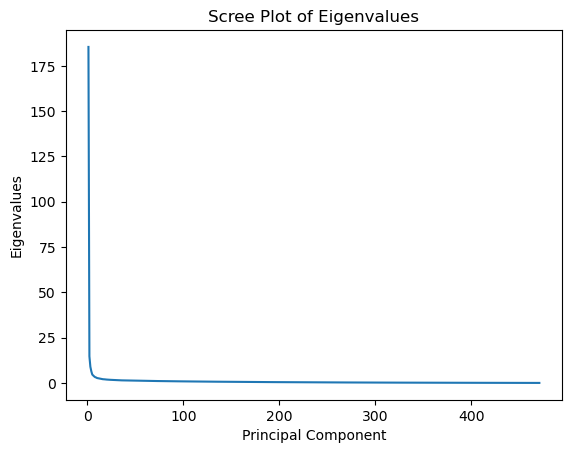

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fit PCA

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(scaled_data)

# Scree plot with eigenvalues
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot of Eigenvalues')
plt.show()


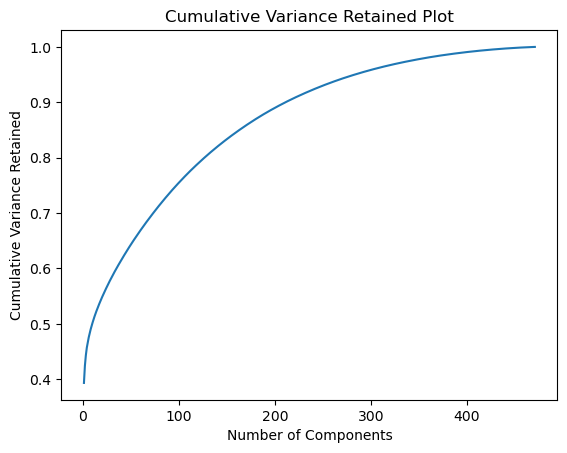

In [96]:
# Cumulative variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Retained Plot')
plt.show()


In [84]:
# Find the number of components needed for 80% variance
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components to retain 80% of the variance: {n_components}")


Number of components to retain 80% of the variance: 127


# Question 1-b

<Figure size 1200x600 with 0 Axes>

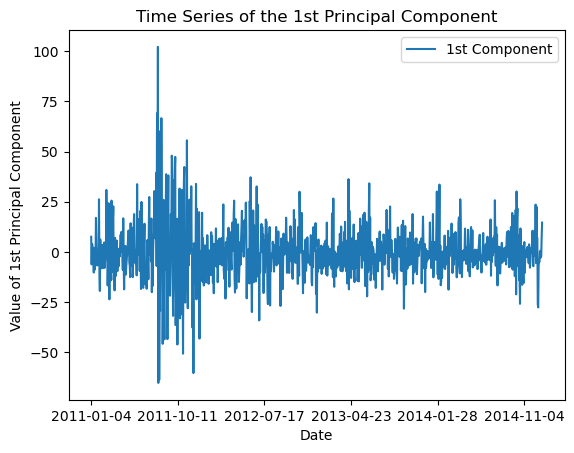

Date with the lowest value for the 1st principal component: 2011-08-09


In [85]:
# Compute the time series of the 1st principal component
first_component_time_series = pca.transform(scaled_data)[:, 0]

# Creating a DataFrame for the time series using the original index from log_returns
first_component_df = pd.DataFrame(first_component_time_series, index=log_returns.index, columns=['1st Component'])

# Plotting the time series of the 1st principal component
plt.figure(figsize=(12, 6))
first_component_df.plot(title='Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value of 1st Principal Component')
plt.show()

# Identifying the date with the lowest value for the 1st principal component
lowest_value_date = first_component_df.idxmin()
print("Date with the lowest value for the 1st principal component:", lowest_value_date[0])

In [89]:
# Extracting the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Creating a DataFrame to hold these weights
weights_df = pd.DataFrame({
    'Stock': log_returns.columns,
    '1st Component Weights': weights_pc1,
    '2nd Component Weights': weights_pc2
})

# Displaying the first few rows of the DataFrame
weights_df.head()

,Stock,1st Component Weights,2nd Component Weights
0,MMM,-0.061483,-0.004348
1,ACE,-0.056123,0.037012
2,ABT,-0.013384,0.016967
3,ANF,-0.031428,-0.038111
4,ADBE,-0.048731,-0.022370


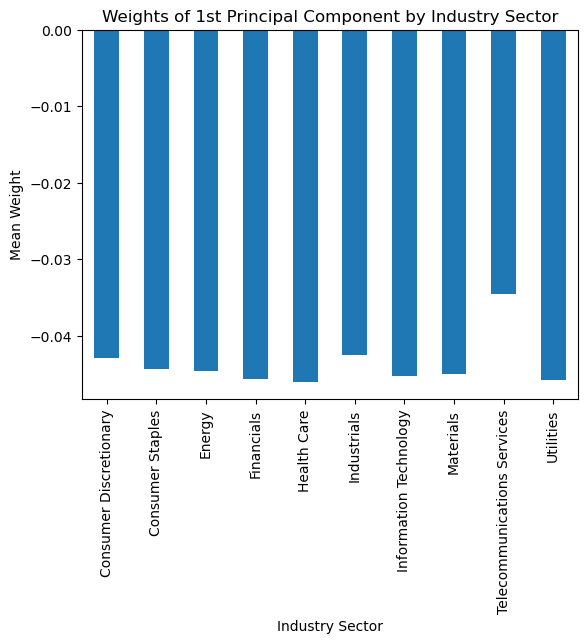

In [93]:
# Assuming you've performed PCA and calculated weights_pc1 (1st principal component)

# Extract relevant sector information from 'ticker_data'
sector_data = ticker_data.loc[log_returns.columns.intersection(ticker_data.index), 'sector'].dropna()

# Ensure 'weights_pc1' has the same length as 'sector_data'
weights_pc1 = weights_pc1[:len(sector_data)]

# Initialize 'weights_df' with 'sector_data'
weights_df = pd.DataFrame({'sector': sector_data})

# Combine weights with corresponding industry sectors for the 1st principal component
weights_df['Weight_pc1'] = weights_pc1  # No need for .values

# Create a bar plot of mean weight per sector for the 2nd principal component
mean_weights_pc1 = weights_df.groupby('sector')['Weight_pc1'].mean()
mean_weights_pc1.plot(kind='bar')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.title('Weights of 1st Principal Component by Industry Sector')
plt.show()


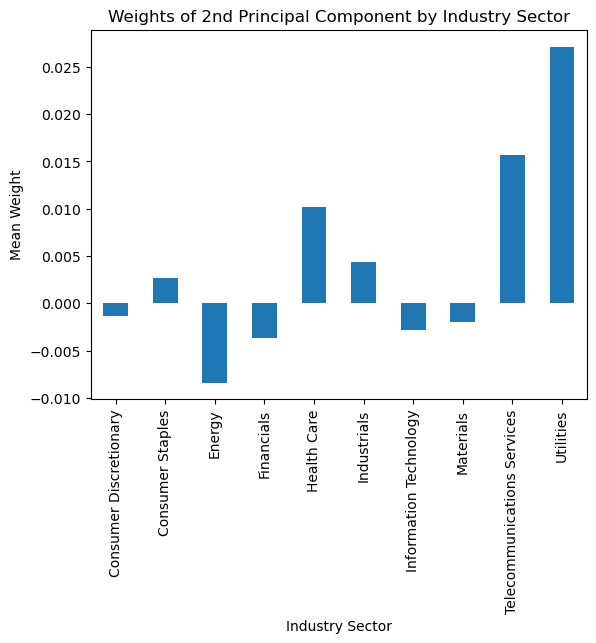

In [92]:
# Assuming you've performed PCA and calculated weights_pc2 (2nd principal component)

# Extract relevant sector information from 'ticker_data'
sector_data = ticker_data.loc[log_returns.columns.intersection(ticker_data.index), 'sector'].dropna()

# Ensure 'weights_pc2' has the same length as 'sector_data'
weights_pc2 = weights_pc2[:len(sector_data)]

# Initialize 'weights_df' with 'sector_data'
weights_df = pd.DataFrame({'sector': sector_data})

# Combine weights with corresponding industry sectors for the 2nd principal component
weights_df['Weight_pc2'] = weights_pc2 

# Create a bar plot of mean weight per sector for the 2nd principal component
mean_weights_pc2 = weights_df.groupby('sector')['Weight_pc2'].mean()
mean_weights_pc2.plot(kind='bar')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.title('Weights of 2nd Principal Component by Industry Sector')
plt.show()


# Question 2

In [106]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('BMI.csv')

# Separate features and target
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Forward Stepwise Regression
def forward_stepwise_selection(X, y):
    selected_features = []
    remaining_features = set(X.columns)
    
    while remaining_features:
        best_mse = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train, X_test, y_train, y_test = train_test_split(X[current_features], y, test_size=0.2, random_state=42)
            
            model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
            y_pred = model.predict(sm.add_constant(X_test))
            
            mse = mean_squared_error(y_test, y_pred)
            
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
        
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    
    return selected_features

# Backward Stepwise Regression
def backward_stepwise_selection(X, y):
    cols = list(X.columns)
    selected_features_BE = []
    pmax = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[selected_features_BE + cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if pmax > 0.05:
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

# Example usage
forward_selected_features = forward_stepwise_selection(X, y)
print("Forward Stepwise Selected Features:", forward_selected_features)

backward_selected_features = backward_stepwise_selection(X, y)
print("Backward Stepwise Selected Features:", backward_selected_features)


Forward Stepwise Selected Features: ['Abdomen', 'Weight', 'Forearm', 'Neck', 'Hip', 'Thigh', 'Age', 'Knee', 'Ankle', 'Chest', 'Height', 'Biceps', 'Wrist']
Backward Stepwise Selected Features: ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']


In [107]:
# Calculate correlation between features and target
correlation_matrix = data.corr()['fatpctg'].abs().sort_values(ascending=False)

# Feature ranking
feature_ranking = correlation_matrix.drop('fatpctg')
print("Feature Ranking based on Correlation:")
print(feature_ranking)


Feature Ranking based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


In [108]:
from sklearn.linear_model import LassoCV

# Load the data
data = pd.read_csv('BMI.csv')

# Separate features and target
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Fit Lasso regression
lasso = LassoCV()
lasso.fit(X, y)

# Feature importance from Lasso
lasso_feature_importance = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
print("Lasso Regression Feature Importance:")
print(lasso_feature_importance)


Lasso Regression Feature Importance:
Abdomen    0.930725
Forearm    0.280250
Thigh      0.204829
Biceps     0.077553
Age        0.045346
Knee      -0.000000
Ankle      0.000000
Chest     -0.003042
Height    -0.049153
Weight    -0.072264
Hip       -0.193026
Neck      -0.450030
Wrist     -0.963250
dtype: float64


In [109]:
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('BMI.csv')

# Separate features and target
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Fit Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance from Random Forest
rf_feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(rf_feature_importance)


Random Forest Feature Importance:
Abdomen    0.731153
Height     0.029401
Weight     0.029395
Wrist      0.026041
Knee       0.023688
Neck       0.023267
Hip        0.022485
Age        0.022080
Thigh      0.020623
Chest      0.020444
Ankle      0.019897
Biceps     0.017453
Forearm    0.014072
dtype: float64
